In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df = pd.read_excel('jeju_tourspots.xlsx')
df.head()

,type,place,latitude,longitude,timecost,satisfaction
0,view,성산일출봉,33.458715,126.941939,90,3
1,view,금오름,33.351591,126.304954,90,1
2,view,교래휴양림,33.441715,126.666791,90,2
3,view,한라산영실코스,33.348627,126.495965,90,2
4,view,곶자왈,33.282901,126.273408,90,2


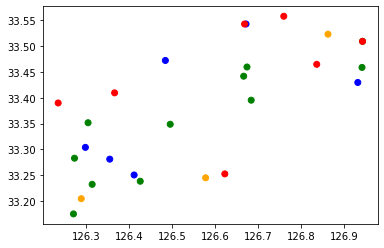

In [108]:
colors = {'view':'green', 'walk':'orange', 'museum':'blue', 'activity':'red'}

fig, ax = plt.subplots()
ax.scatter(df['longitude'], df['latitude'], c=df['type'].map(colors))

plt.show()

In [109]:
import math

result = []

for i in range(df.shape[0]):
    latitude = df.iloc[i].latitude
    longitude = df.iloc[i].longitude
    
    n = i + 1
    while n < df.shape[0]:
        lat_diff = latitude - df.iloc[n].latitude
        long_diff = longitude - df.iloc[n].longitude
        
        distance = math.sqrt(math.pow(lat_diff, 2) + math.pow(long_diff, 2))
        result.append([df.iloc[i].place, df.iloc[n].place, distance])
        n += 1

result

[['성산일출봉', '금오름', 0.6459299045569978],
 ['성산일출봉', '교래휴양림', 0.2756726716669621],
 ['성산일출봉', '한라산영실코스', 0.4593606169666763],
 ['성산일출봉', '곶자왈', 0.6912628013693493],
 ['성산일출봉', '산방산용머리해안', 0.6670713338624311],
 ['성산일출봉', '사려니숲길', 0.26533459924405844],
 ['성산일출봉', '우도', 0.050534849608956545],
 ['성산일출봉', '가파도', 0.7284588904063226],
 ['성산일출봉', '송악산둘레길', 0.7005773757423247],
 ['성산일출봉', '올레6코스', 0.42182300949094803],
 ['성산일출봉', '올레21코스', 0.10200128687914309],
 ['성산일출봉', '스위스마을', 0.2674573159534158],
 ['성산일출봉', '주상절리', 0.5608054013407874],
 ['성산일출봉', '전이수갤러리', 0.28248727943927887],
 ['성산일출봉', '넥슨컴퓨터박물관', 0.4574267539978402],
 ['성산일출봉', '피규어박물관', 0.6128953102545315],
 ['성산일출봉', '유민미술관', 0.030748774577209495],
 ['성산일출봉', '테디베어박물관', 0.5693933580583828],
 ['성산일출봉', '항공우주박물관', 0.6615940441388553],
 ['성산일출봉', '우도보트', 0.050534849608956545],
 ['성산일출봉', '투명카약', 0.37984834165756726],
 ['성산일출봉', '함덕해수욕장', 0.2857134465526635],
 ['성산일출봉', '금능해수욕장', 0.7098597327056927],
 ['성산일출봉', '김녕해수욕장', 0.20716262084893647

In [110]:
ab = []
for t in range(len(result)):
    ab.append(result[t][2])

df2 = pd.DataFrame(ab)
df2.describe()

,0
count,351.000000
mean,0.329119
std,0.192272
min,0.000000
25%,0.166915
50%,0.294169
75%,0.463605
max,0.750679


In [111]:
spots = df.to_numpy()

def greedy_travel_planning(start, excludes):
    time = 480       # 8 hours
    current = start
    path = [start]

    while time > 0:
        score_array = np.zeros(len(spots))
        time_array = np.zeros(len(spots))

        latitude = spots[current][2]
        longitude = spots[current][3]

        for i in range(len(spots)):
            if (i in path) or (i in excludes):
                continue
            lat_diff = latitude - spots[i][2]
            long_diff = longitude - spots[i][3]

            distance = math.sqrt(math.pow(lat_diff, 2) + math.pow(long_diff, 2))
            if distance > 0.3:
                continue
            travel_time = (distance * 150) + spots[i][4]
            if travel_time > time:
                continue

            score_array[i] = (spots[i][4] * spots[i][5]) / travel_time
            time_array[i] = travel_time

        if sum(score_array) == 0:
            break
        next_spot = np.argmax(score_array)
        path.append(next_spot)
        current = next_spot
        time -= time_array[next_spot]
    
    return path

In [126]:
def display_path(path):
    fig, ax = plt.subplots()
    ax.scatter(df['longitude'], df['latitude'], c='yellowgreen')

    path_string = ''
    lats = []
    longs = []
    for i in range(len(path)):
        path_string = path_string + spots[path[i]][1] + ' - '
        lats.append(spots[path[i]][2])
        longs.append(spots[path[i]][3])

    print('')
    print(path_string[:-3])
    ax.scatter(longs, lats, c='red')

    plt.show()

In [119]:
spots

array([['view', '성산일출봉', 33.458715, 126.941939, 90, 3],
       ['view', '금오름', 33.351591, 126.304954, 90, 1],
       ['view', '교래휴양림', 33.441715, 126.666791, 90, 2],
       ['view', '한라산영실코스', 33.348627, 126.495965, 90, 2],
       ['view', '곶자왈', 33.282901, 126.273408, 90, 2],
       ['view', '산방산용머리해안', 33.232296, 126.314469, 60, 1],
       ['view', '사려니숲길', 33.395255, 126.684305, 90, 1],
       ['view', '우도', 33.509235, 126.943164, 90, 3],
       ['view', '가파도', 33.174971, 126.271013, 120, 1],
       ['walk', '송악산둘레길', 33.204484, 126.289118, 90, 1],
       ['walk', '올레6코스', 33.244921, 126.578309, 90, 2],
       ['walk', '올레21코스', 33.523085, 126.862814, 90, 2],
       ['view', '스위스마을', 33.459554, 126.674483, 90, 2],
       ['view', '주상절리', 33.238262, 126.426281, 60, 3],
       ['museum', '전이수갤러리', 33.542828, 126.672265, 60, 3],
       ['museum', '넥슨컴퓨터박물관', 33.472198, 126.484711, 60, 1],
       ['museum', '피규어박물관', 33.281031, 126.355365, 60, 1],
       ['museum', '유민미술관', 33.429562, 1

In [122]:
import random

path_list = []
excludes = [16, 18, 20]
start = 0

for i in range(8):
    path = greedy_travel_planning(start, excludes)
    path_list.append(path)
    excludes += path
    if (len(spots)-len(excludes)) < 4:
        break
        
    new_start_list = list(set([*range(len(spots))]).difference(excludes))
    random.shuffle(new_start_list)
    start = new_start_list[0]

len(path_list)

4


성산일출봉 - 유민미술관 - 우도 - 레일바이크 - 전이수갤러리 - 함덕해수욕장


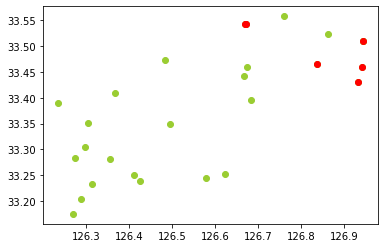


한라산영실코스 - 주상절리 - 올레6코스 - 투명카약 - 교래휴양림


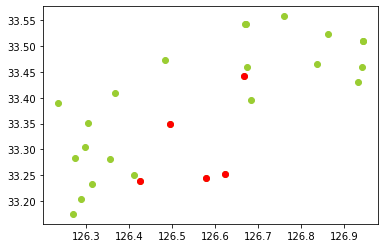


김녕해수욕장 - 올레21코스 - 스위스마을 - 사려니숲길 - 넥슨컴퓨터박물관


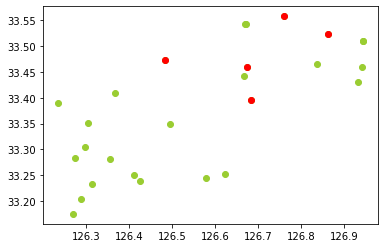


산방산용머리해안 - 곶자왈 - 항공우주박물관 - 금능해수욕장 - 금오름 - 알파카목장


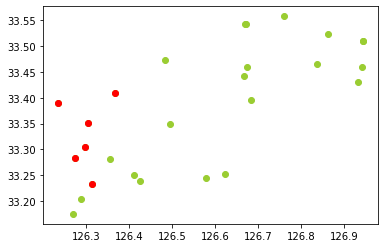

In [127]:
for path in path_list:
    display_path(path)